In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("C:/Users/hp5cd/Downloads/heart_disease_health_indicators_BRFSS2015.csv")
print(df.shape)
print(df.head())

(253680, 22)
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age 

HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


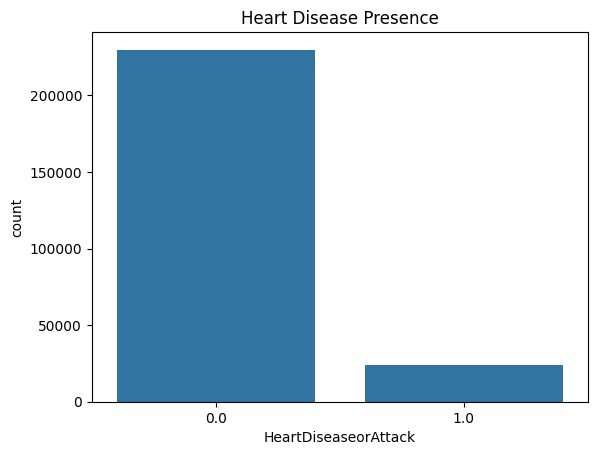

In [5]:
print(df['HeartDiseaseorAttack'].value_counts())
sns.countplot(data=df, x='HeartDiseaseorAttack')
plt.title("Heart Disease Presence")
plt.show()

In [6]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [8]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree")
plt.show()

In [ ]:
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

In [ ]:
dt_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_pruned.fit(X_train, y_train)
pruned_pred = dt_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, pruned_pred))

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

In [ ]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())